In [1]:
import pandas as pd

nodes = pd.read_csv('../network/nodes.csv', delimiter=' ')
edges = pd.read_csv('../network/edges.csv', delimiter=' ')

In [2]:
nodes.head()

,Id,Type
0,1,B
1,2,B
2,3,B
3,4,B
4,5,B


In [3]:
edges.head()

,Source,Target,Review,Time
0,1,10107,0,1030831200
1,1,10108,1,1030831200
2,1,10109,0,1030831200
3,2,10107,0,1032645600
4,3,10110,0,1034892000


In [4]:
import networkx as nx

buyers = nodes[nodes['Type'] == 'B']['Id'].to_list()
sellers = nodes[nodes['Type'] == 'S']['Id'].to_list()

G = nx.Graph(name="Companion Network")
G.add_nodes_from(buyers, bipartite=0)
G.add_nodes_from(sellers, bipartite=1)

for index, row in edges.iterrows():
    G.add_edge(row["Source"], row["Target"], review=row['Review'], time=row['Time'])

In [5]:
from networkx.algorithms import bipartite

B_proj = bipartite.projected_graph(G, buyers, multigraph=False)
S_proj = bipartite.projected_graph(G, sellers, multigraph=False)

In [6]:
print(nx.info(B_proj))
print(nx.info(S_proj))

Graph named 'Companion Network' with 10106 nodes and 668183 edges
Graph named 'Companion Network' with 6624 nodes and 183465 edges


In [7]:
nx.write_edgelist(B_proj, '../network/b_proj.csv')
nx.write_edgelist(S_proj, '../network/s_proj.csv')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def binning(degrees, prob):
    bag_dict = dict()
    for d, p in zip(degrees, prob):
        x = np.log2(d)
        x = np.floor(x)
        bag = 2 ** x
        if bag not in bag_dict.keys():
            bag_dict[bag] = {
                'sum': p,
                'n': 1
            }
        else:
            bag_dict[bag]['sum'] += p
            bag_dict[bag]['n'] += 1
    
    x1 = bag_dict.keys()
    x2 = [v['sum'] / v['n'] for _, v in bag_dict.items()]
    return x1, x2

def cdf(prob, c=.5, alpha=-2):
    cp = lambda x: (c / (1 - alpha)) * (x ** (-1 * (alpha - 1)))
    return [cp(p) for p in prob]

def plot_degree_dist(G, title, file_name, do_cdf=False):
    degrees = [G.degree(n) for n in G.nodes()]
    degrees = sorted(degrees, reverse=True)

    degrees_len = len(degrees)
    prob = [degrees.count(x) / degrees_len for x in degrees]
    
    x1 = degrees
    x2 = prob
    if do_cdf:
        x2 = cdf(x2)

    ax = plt.gca()
    ax.scatter(x1, x2)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_title(title)
    ax.set_xlabel('degree')
    ax.set_ylabel('probability')

    plt.savefig(f'../plots/{file_name}.png')
    plt.show()

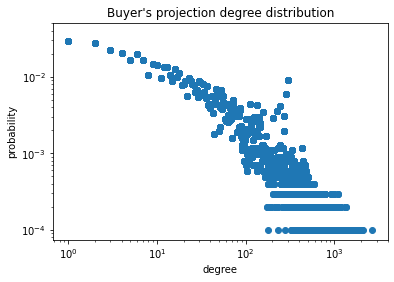

In [12]:
plot_degree_dist(B_proj, '''Buyer's projection degree distribution''', 'b_proj_degree_dist')

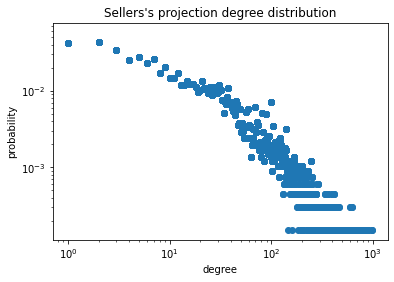

In [13]:
plot_degree_dist(S_proj, '''Sellers's projection degree distribution''', 's_proj_degree_dist')